<a href="https://colab.research.google.com/github/a-forty-two/DataSetsForML/blob/master/18_DTree%20revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
!ls # data.csv from breast cancer analysis problem 


data.csv  sample_data


In [10]:
alldata = pd.read_csv('data.csv', header=0)
df = alldata.iloc[:,[1,2,3,4,5,6,9]]
# Z-score -> x-mean/std

df.head()

# linear equation -> DOES'nt change on change of scale 


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,concave points_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.14710
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07017
2,M,19.69,21.25,130.00,1203.0,0.10960,0.12790
3,M,11.42,20.38,77.58,386.1,0.14250,0.10520
4,M,20.29,14.34,135.10,1297.0,0.10030,0.10430


In [0]:
y = df.pop('diagnosis')

#df_dummy = pd.get_dummies(data=df, columns=['diagnosis'])
x = df  # y = mx +c 
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy =  train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3) # high bias, low variance -> bias-variance tradeoff 
dtree.fit(trainx, trainy)
predictions = dtree.predict(testx)

# create a balance between BIAS and VARIANCE 
# if your tree is too shallow -> HIGH bias, LOW variance 
# if your tree is too deep -> LOW bias, HIGH variance 

In [0]:
dtree_deep = DecisionTreeClassifier(max_depth=10) # high variance, low bias -> bias-variance tradeoff 
dtree_deep.fit(trainx, trainy)
predictions_deep = dtree_deep.predict(testx)




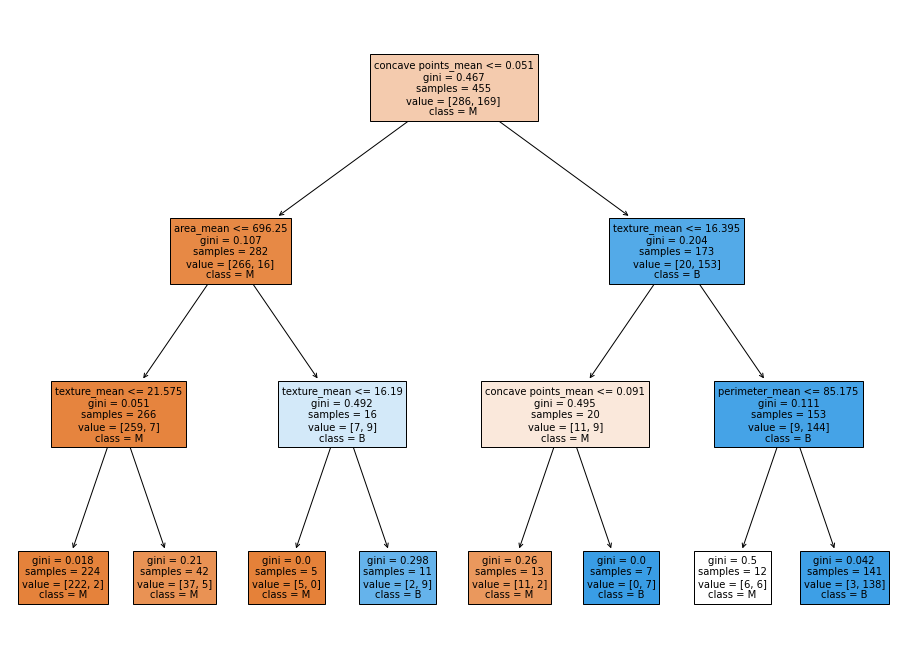

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names = x.columns, fontsize=10, filled=True, class_names=['M','B'])
plt.show()

# CLASSICATION -> GINI, ENTROPY -> REAL valued output on a tree node 
# based on threshold we classify GINI and ENTROPY (CROSS ENTROPY)
# CART -> Classification and Regression Tree 

# Dtree tries to find the BEST variable (GINI-> 0.5) and pick it as the FIRST FILTER 
# Then classification is all about finding good-bad variable pairs that could act as filters on 
# B and M


# Random Forest -> CREATING MANY DECISION TREES
# if all of them were going to do the same thing, with same calc, then how are they diff?
# NO, they were NOT going to be same trees
# THEY are ESTIMATORS -> they are linear equations designed as trees -> a tree ACTUALLY doesn't learn 
# anything! -> learning means, updating weights! if weights for learning were not updating, then how was it learning?
# DTree-> extract LIMITs which can be used as TRESHOLDS in other algos 

#RF => multiple algorithms are used, where this Linear Estimator algorithm is just 1 of them 
# RF may even create a tree, that follows KNN equation to distribute variables 
# RF may even create a SVM tree! 
# RF is just running multiple algorithms and ensuring the data structure to solve them is TREE 
# TREE is used because of its performance in SEARCH, add, removing nodes 
# since this is binary-search tree, the performance will be calculated as log2 of depth of search-item 
# (it is VERY, VERY fast-> few mins for TBs of data)

# GINI calc -> AREA-> SVM also gives an area distribution!!!! KNN 
# n_estimators -> BCA -> NaiveBayes/RF 
# BAGGING -> taking an entire tree, and bagging it into a single node (SINGLE EQUATION)
# GINI value per variable, GINI will be calculated on the entire equation comprising of those
# variables 
# c = 0.051conc - 16.395 text*0.204.... prei_mean 
# GINI will be calculated as area ratio of M and B on c rather than individual variables 
# this increases BIAS towards C, but results in VERY fast calculation as there is no traversal on the tree!
# answer is on the top of the tree itself! 
# RF -> parallelize -> hardware may not be always available 
# RF is designed for parallelization, it rarely happens. RF (N_estimators=10) will take roughly 10 times more time
# to eval thing than a Dtree
# XGBoost -> does parallelization at massive scale. It is not recommended to run XGBoost on a single machine 
# anyway serial execution was going to happen
# when we have so much time, why not pick the next tree in such a way that its performance is better than the current
# performance threshold 
# Boosting -> select next tree only if it is better 
# Boosting makes RF a serial calculation rather than parallel 

#RF is by default parallel yes, BUT ONLY for BIGDATA on a BIG DATA hardware architecture
# most cases (like sklearn) -> you'll find serial behavior, not parallel 

# GINI (freq dist) v/s Entropy (real values)

# GINI or ENTROPY to calculate threshold is GOING to happen anyway! even SVM/any algo is plotting an area or a boundary! 
# hence the formula Gini is possible on any shape, line, point, curve, volume 
# SVM -> y  = a2 + b2 + 2ab (in such an equation, normalization is going to have an impact)
# why? square or any higher power= area changed, hence Gini value will change 
# GINI will calculate M, B cancers w.r.t. a2, b2 and then 2ab 

# [ 0 ]  => [[0],[1]] IMAGE => [[ [ 0 ],[1]]] [video]
# video is an array of images 
# images are an array of numbers





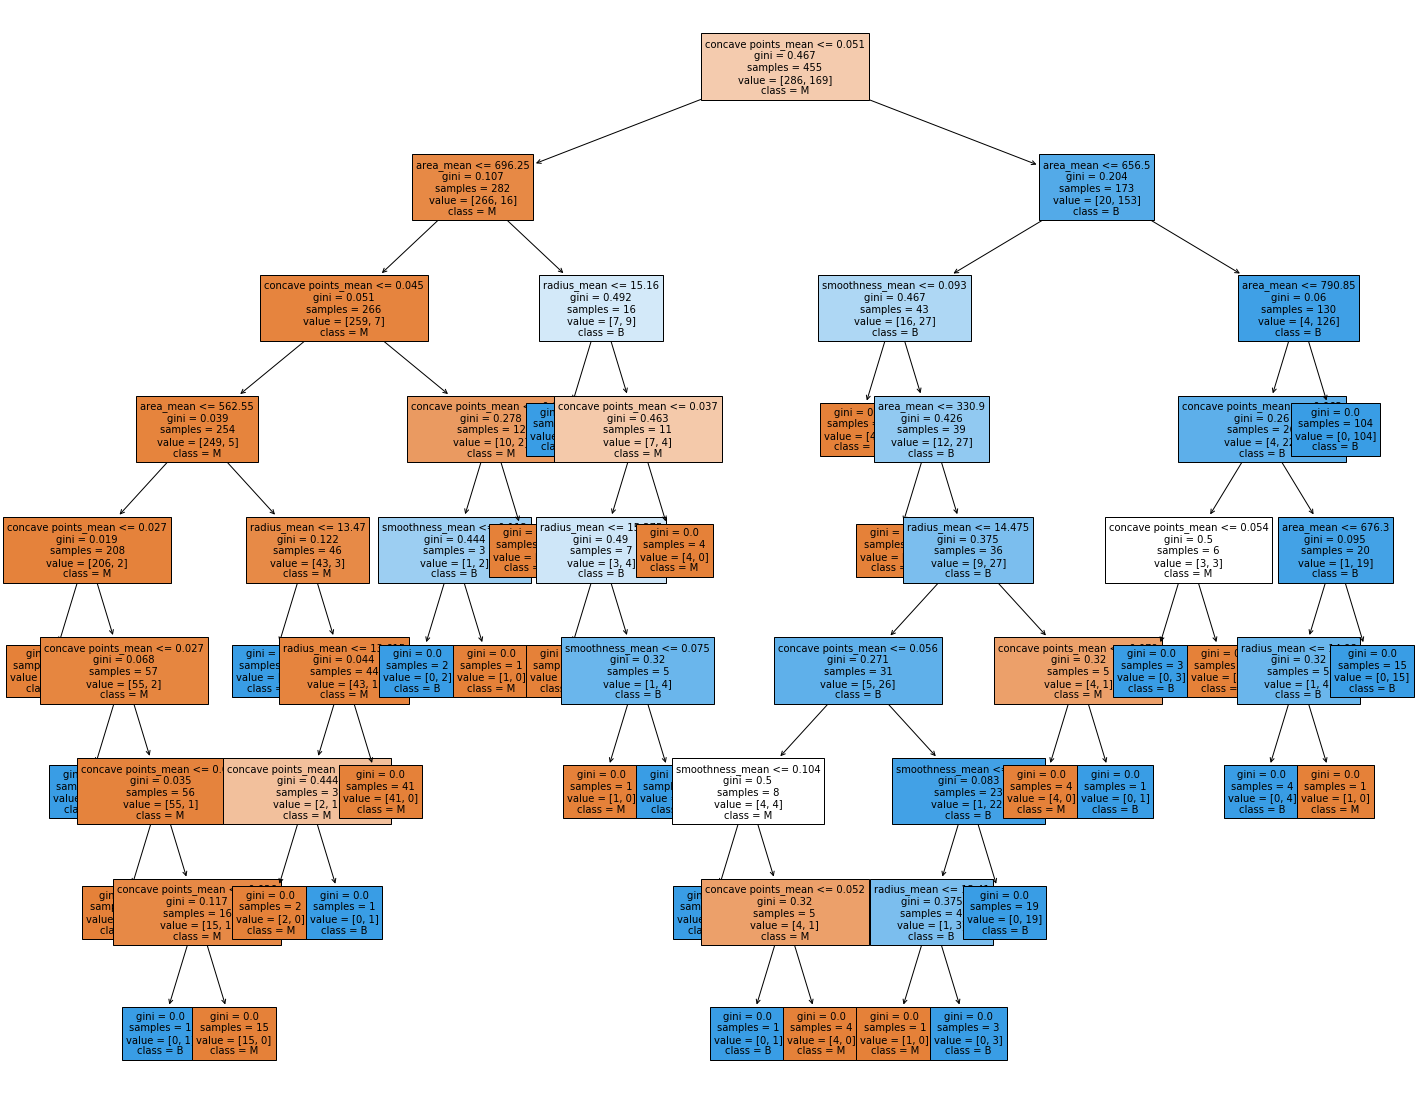

In [0]:
fig = plt.figure(figsize=(25,20))
a = plot_tree(dtree_deep, feature_names = x.columns, fontsize=10, filled=True, class_names=['M','B'])
plt.show()

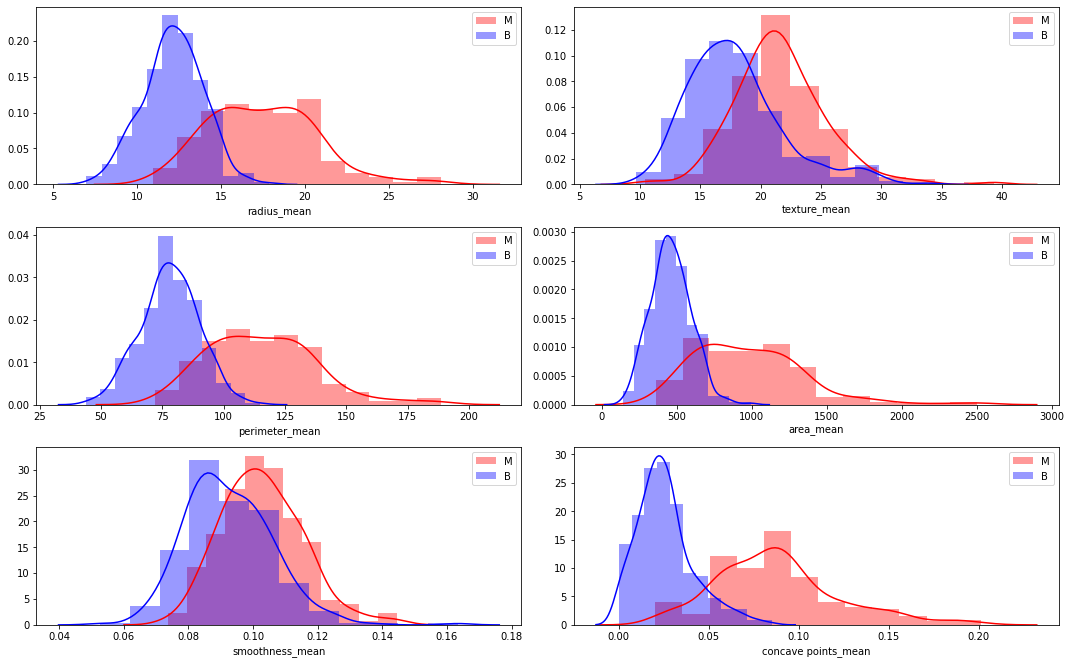

In [13]:
bins = 12
data = alldata
import seaborn as sns

plt.figure(figsize=(15,15))
for i,feature in enumerate(x.columns):
    rows = 5
    plt.subplot(rows,2,i+1)
    sns.distplot(data[data['diagnosis']=='M'][feature],bins
                 =bins, color='red',label='M')
    sns.distplot(data[data['diagnosis']=='B'][feature],bins=
                bins, color='blue',label='B')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



These plots tell us that we could have visually differentiated between good and bad variables. 

To do it programatically, we needed a mathematical formula 

GINI turns out to be that formula-> it compares area
BECAUSE it is comparing area of DISTRIBUTION, there is no REAL data, but FREQUENCY. 

Hence, the data or any plot DOESn't have ANY UNIT. Hence, again, no normalization required.




ENTROPY-> doesn't have unit-> because SAME variable will be compared to itself, usually in a loss function. Hence, entropy calculations also do not require explicit normalization. 

In [0]:
# diff water and air
# difficult to classify between them based on useless variables 
# GOOD variables based on which diff could be easy
# M, B -> Radius, smoot, concat

# Radius -> cancerous cells -> > x , non -> < x 
# this is a sign on good variable 

# smoothness-> gt 0.5 can get cancer , lt 0.6 have lesser chances of cancer <- overlap area of 0.5 to 0.6 -> 0.1 overlap-> 10% axis wasted on overlap -> 90% fromx axis, 
# AREA calculation: instead of DIFFERENCE between the axises, we prefer calculating diff between areas plotted 
# which were represented axises anyway!!


# a DECISION TREE CLASSIFIER would calculate GINI and try to create to create a y=mx+c, such that the GINI calculations 
# of area under each variable, starts tending to either 1 or 0!
# which ends up becoming classification for us 
# THIS can only create BINARY classification -> DECICION tree needs YES and NO! or TRUE/FAlse 1/0

